# **Causal Inference from Sleep and Lifestyle Data**

## **Worked Example**

Name: Apoorv Dhaygude   
NUID: 002207325

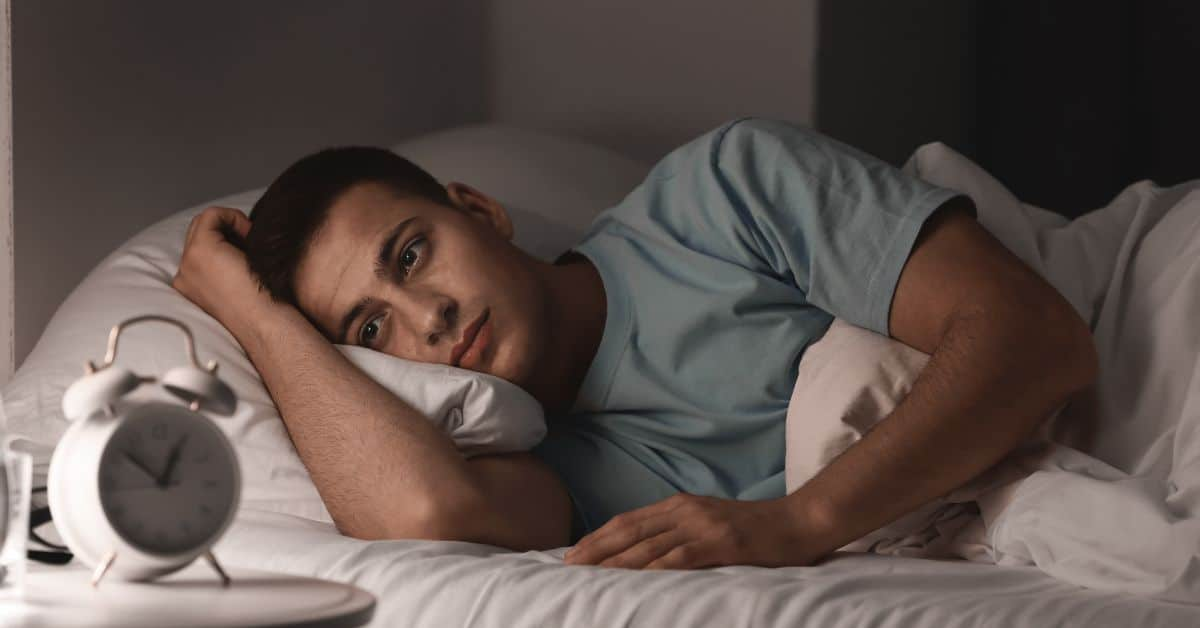

#**Abstract**

The **Sleep Health and Lifestyle Dataset** comprises 400 observations across 13 variables, offering a comprehensive profile of individuals' sleep behaviors, lifestyle factors, and physiological health indicators. This dataset is well-suited for causal inference research aimed at uncovering the mechanisms influencing sleep duration, sleep quality, and the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

It enables the formulation and testing of causal hypotheses using graph-based approaches, including **Directed Acyclic Graphs (DAGs)** and **structural causal models (SCMs)**. With a diverse set of covariates, the dataset supports adjustment for confounding, mediation analysis, and effect modification.


## **Key Features for Causal Analysis**

- **Sleep Metrics**: Variables such as `Sleep Duration` and `Quality of Sleep` can serve as outcomes or mediators in sleep-related causal pathways.
- **Lifestyle and Behavioral Covariates**: Daily `Physical Activity Level`, `Stress Level`, and `BMI Category` provide potential causal factors or confounders influencing sleep and health outcomes.
- **Cardiovascular Indicators**: `Blood Pressure` and `Heart Rate` may act as mediators or effect modifiers in the relationship between lifestyle and sleep quality.
- **Sleep Disorders**: The `Sleep Disorder` variable (`None`, `Insomnia`, `Sleep Apnea`) serves as a key outcome or stratification factor for studying the causal impact of behavioral and physiological variables.


# **Dataset Overview**

- **Person ID**: Unique identifier for each individual.
- **Gender**: Gender of the individual (`Male` / `Female`).
- **Age**: Age in years.
- **Occupation**: Professional occupation of the individual.
- **Sleep Duration (hours)**: Average number of hours of sleep per day.
- **Quality of Sleep (1–10)**: Self-reported sleep quality on a scale from 1 (poor) to 10 (excellent).
- **Physical Activity Level (minutes/day)**: Total minutes of physical activity per day.
- **Stress Level (1–10)**: Self-reported stress level on a scale from 1 (low) to 10 (high).
- **BMI Category**: Body Mass Index category (`Underweight`, `Normal`, `Overweight`).
- **Blood Pressure (systolic/diastolic)**: Blood pressure recorded as systolic over diastolic.
- **Heart Rate (bpm)**: Resting heart rate in beats per minute.
- **Daily Steps**: Total number of steps taken per day.
- **Sleep Disorder**: Classification of sleep condition (`None`, `Insomnia`, `Sleep Apnea`).



## **Sleep Disorder Categories**

- **None**: No evidence of a clinically recognized sleep disorder.
- **Insomnia**: Difficulty initiating or maintaining sleep, leading to impaired sleep quality and daytime functioning.
- **Sleep Apnea**: Episodes of interrupted breathing during sleep, contributing to fragmented sleep and associated health risks.




# **Importing important Libraries**

In [64]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px

# Statistical modeling
import statsmodels.api as sm

# Graph-based modeling (e.g., DAGs)
import networkx as nx

# Warning configuration
from warnings import filterwarnings
filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# **Load the Dataset**

In [76]:
df = pd.read_csv("https://github.com/apoorv1811/Advances-in-Data-Sciences/raw/main/Sleep_health_and_lifestyle_dataset.csv")

In [77]:
# Preview the first few rows of the dataset
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [78]:
# Check the number of rows and columns in the dataset
df.shape

(374, 13)

In [79]:
# Statistical Summary of Training Dataset
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [80]:
# Display dataset summary including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **Feature Engineering**

In [81]:
# Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Drop the original 'Blood Pressure' column if it's no longer needed
df.drop('Blood Pressure', axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


This transformation is done to **separate the composite 'Blood Pressure' column**, which contains values like `"120/80"`, into two distinct numeric columns:

- `Systolic`: the top number, representing pressure during heartbeats  
- `Diastolic`: the bottom number, representing pressure between beats  

By splitting and converting them to numeric types, we enable proper **statistical analysis**, **visualization**, and **causal modeling** involving blood pressure as two meaningful physiological variables.

# **Data Preprocessing**

## **Identify Categorical and Numerical Columns**

In [82]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical Columns:", categorical_columns)

numerical_columns = [col for col in df.columns if col not in categorical_columns]
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
Numerical Columns: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']


## **Converting categorical variables to numeric using LabelEncoder**

In [83]:
# Encoding categorical variables
encoder = LabelEncoder()

# Encode Gender
df['Gender'] = encoder.fit_transform(df['Gender'])

# Encode Occupation
df['Occupation'] = encoder.fit_transform(df['Occupation'])

# Encode BMI Category
df['BMI Category'] = encoder.fit_transform(df['BMI Category'])

# Encode Sleep Disorder (NaN will remain NaN for now)
df['Sleep Disorder'] = encoder.fit_transform(df['Sleep Disorder'].astype(str))

# Display the dataframe after encoding
print("Data after encoding categorical variables:")
print(df)

Data after encoding categorical variables:
     Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1   27           9             6.1                 6   
1            2       1   28           1             6.2                 6   
2            3       1   28           1             6.2                 6   
3            4       1   28           6             5.9                 4   
4            5       1   28           6             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       0   59           5             8.1                 9   
370        371       0   59           5             8.0                 9   
371        372       0   59           5             8.1                 9   
372        373       0   59           5             8.1                 9   
373        374       0   59           5             8.1                 9   

     Physical Activity Level  St

Categorical variables must be converted to numeric form to be used in statistical models, machine learning, and causal inference algorithms.
Using LabelEncoder maps each category to a unique integer. Converting Sleep Disorder to string ensures NaN values don't raise errors — you can handle those separately afterward if needed.

## **Handling Missing Values**

Handling missing values ensures the dataset is complete and ready for modeling.

Numerical columns are imputed with the mean to preserve overall distribution.  
Categorical columns are imputed with the most frequent value to maintain mode-based consistency.

In [84]:
# Define imputers
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical features
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Systolic','Diastolic','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

# Impute categorical features
cat_cols = ['BMI Category', 'Sleep Disorder', 'Occupation']
df[cat_cols] = most_frequent_imputer.fit_transform(df[cat_cols])

# Display the dataframe after imputing missing values
print("\nData after imputing missing values:")
print(df)


Data after imputing missing values:
     Person ID  Gender   Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       1  27.0           9             6.1               6.0   
1            2       1  28.0           1             6.2               6.0   
2            3       1  28.0           1             6.2               6.0   
3            4       1  28.0           6             5.9               4.0   
4            5       1  28.0           6             5.9               4.0   
..         ...     ...   ...         ...             ...               ...   
369        370       0  59.0           5             8.1               9.0   
370        371       0  59.0           5             8.0               9.0   
371        372       0  59.0           5             8.1               9.0   
372        373       0  59.0           5             8.1               9.0   
373        374       0  59.0           5             8.1               9.0   

     Physical Activity Lev

## **Verify Dataset**
Verify whether any missing values remain in the dataset after imputation, providing both the count and percentage for each column. It ensures the data is fully prepared for downstream analysis or modeling.

In [85]:
total=df.isnull().sum()
percent=(df.isnull().sum()/df.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Person ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
Sleep Duration,0,0.0
Quality of Sleep,0,0.0
Physical Activity Level,0,0.0
Stress Level,0,0.0
BMI Category,0,0.0
Heart Rate,0,0.0


# **Exploratory Data Analysis (EDA)**

## **Distribution of Sleep Duration**

In [86]:
# Visualize the distribution of Sleep Duration with histogram and KDE elements
fig = px.histogram(
    df,
    x='Sleep Duration',
    nbins=30,
    marginal='violin',  # Adds a violin plot on the side
    opacity=0.7,
    title='Distribution of Sleep Duration'
)

# Enhance trace appearance
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(
    xaxis_title='Hours of Sleep',
    yaxis_title='Count',
    bargap=0.1,
    template='simple_white'
)

fig.show()

This visualization provides insight into how sleep duration is distributed across the population, helping identify central tendencies, skewness, and variability. The violin plot adds a non-parametric estimate of the distribution, which is useful in identifying multimodal patterns or outliers.  

The histogram illustrates the distribution of sleep duration, measured in hours, across a population. The bars represent the frequency of individuals falling within specific sleep intervals, while the density curve highlights the overall trend. Peaks around 6.5 and 8 hours suggest clusters of individuals with similar sleep habits, while dips near 7 and 7.5 hours indicate fewer people achieving the recommended sleep duration.

In the context of causality, this visualization helps identify key patterns and anomalies in the data, which are crucial for forming hypotheses about potential causes and effects. For instance, variations in sleep duration may correlate with factors like work schedules, stress, or health, making these variables candidates for causal investigation.

This step is a critical aspect of data preparation for machine learning models, as understanding the underlying data distribution allows researchers to define meaningful causal relationships and avoid biases. By exploring these patterns, we can guide model design and ensure more accurate inferences about how variables like sleep impact downstream outcomes.

## **Boxplot of Sleep Quality**

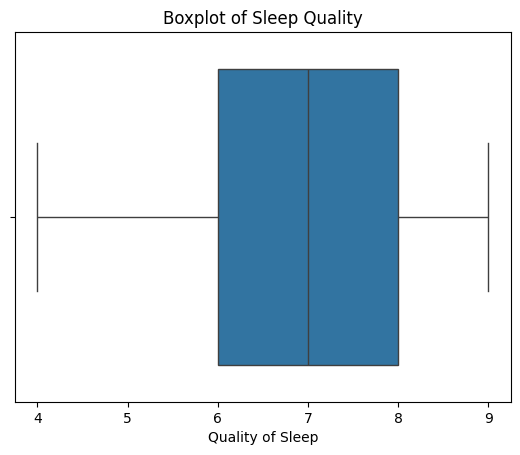

In [87]:
# Visualize the boxplot of sleep quality
sns.boxplot(x=df['Quality of Sleep'])
plt.title('Boxplot of Sleep Quality')
plt.show()

The boxplot offers a visual summary of the distribution of the **"Quality of Sleep"** variable, supporting insights relevant for causal analysis:

- **Interquartile Range (IQR)**: A narrow IQR indicates low variability in sleep quality among individuals, suggesting that most responses cluster around similar values. This consistency reduces noise, making it easier to detect true causal effects.

- **Median as Central Tendency**: The median represents the typical sleep quality level. Understanding this helps assess how changes in predictors (e.g., stress or physical activity) may shift the central outcome.

- **Lack of Outliers**: The absence of significant outliers improves dataset stability, reducing the risk of skewed causal estimates due to extreme values.

- **Range**: The whiskers indicate the overall spread of sleep quality scores. A moderate range reinforces that the variable is not overly dispersed, enhancing interpretability.

- **Implications for Causal Inference**: The consistent distribution of sleep quality supports the validity of modeling its causal relationships with lifestyle and physiological factors, as variation appears to stem from measurable inputs rather than random fluctuations.


## **Correlation Matrix of Variables**

The correlation matrix visualizes pairwise linear relationships between variables in the dataset. Strong positive or negative correlations may indicate potential associations worth exploring in causal inference models. While correlation does not imply causation, it helps identify candidate variables for causal graph construction or adjustment sets.


In [88]:
# Compute correlation matrix and visualize it using an interactive heatmap
corr_matrix = df.corr()

# Reset index for compatibility with Plotly
corr_df = corr_matrix.reset_index().melt(id_vars='index')
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']

# Create interactive heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Correlation Matrix',
    aspect='auto'
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    template='simple_white'
)

fig.show()

The heatmap visualizes the correlation matrix, highlighting relationships between various predictors and the outcome variable of interest: **Stress Level**. While correlation does not imply causation, these associations can inform the structure of causal models and guide variable selection.



### **Key Relationships**

- **Stress Level and Sleep Duration**: A strong negative correlation (**-0.81**) suggests that longer sleep duration is associated with lower stress, indicating a potential **direct causal link**.
  
- **BMI Category and Stress Level**: A moderate negative correlation (**-0.35**) points to a possible indirect causal pathway, perhaps mediated by sleep or physical activity.

- **Sleep × BMI Interaction**: Regression analysis shows this interaction is **not statistically significant**, suggesting that their combined effect on stress is limited compared to their individual impacts.



### **Notable Predictor-Predictor Interactions**

- **Quality of Sleep and Sleep Duration**: A high correlation (**0.88**) highlights their interdependence. Quality of sleep may function as a **mediator** or **collider** in causal models involving stress.

- **BMI Category and Physical Activity**: A moderate positive correlation (**0.77**) implies higher activity levels among individuals with higher BMI, possibly due to health management efforts.

- **Sleep Duration and BMI Category**: A moderate negative correlation (**-0.38**) suggests that individuals with higher BMI tend to sleep less, which may contribute to elevated stress.



#### **Other Observations**

- **Physical Activity and Stress Level**: Weak correlation (**-0.034**) suggests minimal direct influence on stress.

- **Heart Rate and Stress Level**: A small positive correlation (**0.16**) may reflect a mild physiological response to stress.

- **Daily Steps and Stress Level**: Negligible correlation (**-0.004**) implies limited relevance for modeling stress outcomes.



### **Implications for Causal Modeling and Decision-Making**

- **Focus on Sleep Variables**: Sleep Duration and Quality of Sleep emerge as **primary predictors** of stress and should be central in causal analysis and intervention strategies.

- **BMI's Indirect Role**: BMI likely influences stress through mediators such as sleep or activity, warranting its inclusion as a covariate rather than a primary cause.

- **Minimal Contribution from Steps and Activity**: Predictors with weak correlations (e.g., daily steps) may be excluded from simplified models without loss of explanatory power.


### **Modeling Considerations**

- **Multicollinearity**: High correlation between Sleep Duration and Quality of Sleep necessitates caution when including both in regression models.

- **Variable Selection**: Prioritize predictors with strong or theoretically supported relationships to stress; avoid noise from weakly associated features.



### **Causal Perspective**

The correlation structure supports a causal hypothesis that **sleep-related behaviors** have the strongest influence on stress levels. The insights from this matrix can inform **Directed Acyclic Graphs (DAGs)**, guide **adjustment set selection**, and frame hypotheses for further causal estimation.



# **Analysis of Relationships**

## **Scatter Plot: Sleep Duration vs. Stress Level by Gender**

This scatter plot visualizes the relationship between **Sleep Duration** and **Stress Level**, stratified by gender. It helps assess whether longer sleep is associated with lower stress and whether this relationship varies across genders.

- A negative trend would suggest a potential **causal effect** of sleep duration on stress.
- Gender-based color coding allows for a visual check of effect heterogeneity (i.e., whether the sleep-stress relationship differs by gender).
- This visualization supports exploratory causal analysis by identifying patterns, outliers, and potential confounders.


In [89]:
# Scatter plot: Sleep Duration vs. Stress Level, colored by Gender
fig = px.scatter(
    df,
    x='Sleep Duration',
    y='Stress Level',
    color='Gender',
    title='Sleep Duration vs Stress Level',
    labels={
        'Sleep Duration': 'Hours of Sleep',
        'Stress Level': 'Stress Level'
    },
    opacity=0.7,
    template='simple_white'
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Gender')
fig.show()


This scatter plot visualizes the relationship between **Sleep Duration** and **Stress Level**, with points colored by **Gender**. It supports early causal exploration and feature relevance assessment.


### **Observations**

- A **negative association** is evident: individuals with **shorter sleep durations (6–6.5 hours)** tend to report **higher stress levels (7–8)**, while those with **longer sleep durations (7.5–8.5 hours)** report **lower stress levels (3–4)**. This suggests a potential **causal relationship** where insufficient sleep may contribute to elevated stress.

- **Gender Trends**: Both males and females exhibit similar overall trends. However, **females (orange)** appear more widely spread in stress levels at lower sleep durations, hinting at possible gender-specific variability in stress response to sleep deprivation.

- **Clustering**: Clear clusters are visible:
  - **High stress** with **short sleep**
  - **Low stress** with **long sleep**
  
  These clusters may represent latent subgroups and support further causal analysis or stratified modeling.



### **Implications for Causal Inference and Modeling**

- **Hypothesis Generation**: The plot motivates questions like:
  - "Does reduced sleep duration cause increased stress?"
  - "Are there gender differences in the sleep–stress relationship?"

- **Causal Pathway Identification**: Visual trends may suggest confounders (e.g., occupation, lifestyle), helping to inform DAG structure or variable control strategies.

- **Feature Selection**: Sleep Duration and Stress Level emerge as strong candidates for inclusion in causal or predictive models.


Visualizing variable interactions like this is a critical step in preparing data for both **causal inference** and **machine learning**, providing the foundation for model interpretability and theoretical justification.

# **Causal Analysis (Modeling)**

## **Simple Linear Regression: Sleep Duration → Stress Level**

This regression estimates the **causal effect of sleep duration on stress level**, using an Ordinary Least Squares (OLS) model. It quantifies how changes in sleep duration are linearly associated with stress, assuming no unmeasured confounding.

This is a baseline model to test the strength, direction, and significance of the relationship between sleep and stress.


In [90]:
# Define dependent and independent variables
y = df['Stress Level']
X = df[['Sleep Duration']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stress Level   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     715.0
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.24e-88
Time:                        17:02:41   Log-Likelihood:                -544.18
No. Observations:                 374   AIC:                             1092.
Df Residuals:                     372   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.2855      0.485     37.

This regression analysis investigates the potential **causal relationship** between **Sleep Duration** (independent variable) and **Stress Level** (dependent variable) using an Ordinary Least Squares (OLS) model.



### **Model Summary and Goodness-of-Fit**

- **R-squared = 0.658**: Approximately 65.8% of the variability in stress levels is explained by sleep duration, indicating a strong linear relationship.
- **Adjusted R-squared = 0.657**: The adjusted value remains consistent, confirming that the model is not overfitting and that sleep duration is a significant explanatory variable.
- **F-statistic = 715.0**, **p < 0.0001**: The overall model is highly statistically significant.



### **Coefficient Interpretation**

- **Intercept (18.29)**: When sleep duration is zero, the predicted stress level is 18.29 units. Although not interpretable in real-world terms (since no one sleeps 0 hours), it serves as a reference point for the regression line.
- **Sleep Duration Coefficient (-1.81)**: For each additional hour of sleep, stress levels decrease by approximately **1.81 units**. This confirms a strong **negative relationship**, aligning with the hypothesis that longer sleep reduces stress.


### **Statistical Significance**

- **p-value for Sleep Duration < 0.0001**: Indicates the relationship is statistically significant at the **99% confidence level**, supporting a potential **causal link**.
- **Durbin-Watson = 0.804**: Suggests **positive autocorrelation** in residuals, possibly due to unmeasured variables influencing stress.
- **Omnibus and Jarque-Bera (p < 0.05)**: Indicates slight **non-normality** in residuals, which should be considered in model diagnostics.



### **Causal Inference Implications**

- **Causal Interpretation**: The statistically significant, negative association supports the argument that **insufficient sleep may cause higher stress levels**. While observational, the strength of the relationship and its consistency across metrics is compelling.
- **Confounding Considerations**: Although sleep appears to be a strong predictor, further analysis should account for **potential confounders** (e.g., occupation, health, lifestyle) to validate this effect.
- **Intervention Relevance**: Results highlight sleep duration as a potential **leverage point for stress-reduction interventions**, aligning with public health objectives.
- **Strength of Association**: The high R-squared value reinforces the predictive power of sleep duration in modeling stress levels.



### **Conclusion**

This analysis establishes a statistically and practically significant relationship between **Sleep Duration and Stress Level**, providing a quantitative foundation for causal reasoning. It supports further exploration of sleep as an intervention target and justifies the inclusion of sleep metrics in more complex causal models or structural equation frameworks.

# **Mediation Analysis: Does Physical Activity Mediate the Effect of Sleep on Stress?**

This two-step regression framework evaluates whether **Physical Activity Level** mediates the relationship between **Sleep Duration** and **Stress Level**.





## **Step 1: Sleep Duration → Physical Activity (Mediator)**

- A simple linear regression estimates the effect of **Sleep Duration** on **Physical Activity Level**.
- The predicted values from this model serve as a proxy for the **mediator**, isolating the variation in physical activity explained by sleep.


## **Step 2: Sleep Duration + Predicted Activity → Stress Level**

- A second regression examines whether both **Sleep Duration** and the predicted **Physical Activity** influence **Stress Level**.
- This allows us to test:
  - Whether the **direct effect** of sleep on stress remains significant after accounting for physical activity.
  - Whether physical activity carries an **indirect effect** of sleep on stress (i.e., acts as a mediator).

In [92]:
# Step 1: Effect of Sleep Duration on Physical Activity
X_sleep = df[['Sleep Duration']]
y_activity = df['Physical Activity Level']

# Add constant to the predictor
X_sleep_const = sm.add_constant(X_sleep)

# Fit regression model: Sleep Duration → Physical Activity Level
model_activity = sm.OLS(y_activity, X_sleep_const).fit()

# Save predicted physical activity (acts as the mediator)
df['Predicted Activity'] = model_activity.predict(X_sleep_const)

# Step 2: Effect of Sleep Duration and Activity on Stress Level
X_combined = df[['Sleep Duration', 'Predicted Activity']]
y_stress = df['Stress Level']

# Add constant
X_combined_const = sm.add_constant(X_combined)

# Fit regression model: Sleep Duration + Physical Activity → Stress Level
model_stress = sm.OLS(y_stress, X_combined_const).fit()

# Output both model summaries
print("Step 1: Sleep Duration → Physical Activity Level")
print(model_activity.summary())

print("\nStep 2: Sleep Duration + Predicted Activity → Stress Level")
print(model_stress.summary())


Step 1: Sleep Duration → Physical Activity Level
                               OLS Regression Results                              
Dep. Variable:     Physical Activity Level   R-squared:                       0.045
Model:                                 OLS   Adj. R-squared:                  0.043
Method:                      Least Squares   F-statistic:                     17.57
Date:                     Fri, 28 Mar 2025   Prob (F-statistic):           3.47e-05
Time:                             17:09:17   Log-Likelihood:                -1657.2
No. Observations:                      374   AIC:                             3318.
Df Residuals:                          372   BIC:                             3326.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### **Step 1: Sleep Duration → Physical Activity (Mediator)**

**Regression Equation:**  
*Physical Activity Level* = 19.52 + 5.56 × Sleep Duration

- **R-squared = 0.045**: Only 4.5% of the variance in physical activity is explained by sleep duration, indicating a weak linear relationship.
- **Sleep Duration Coefficient = 5.56 (p < 0.001)**: Statistically significant. For every additional hour of sleep, physical activity increases by approximately 5.56 units.

**Interpretation**:  
Longer sleep duration is associated with higher physical activity levels. However, the low R² suggests that **other factors** play a more substantial role in determining physical activity behavior.



### **Step 2: Sleep Duration + Physical Activity → Stress Level**

**Regression Equation:**  
*Stress Level* = 1.89 − 6.48 × Sleep Duration + 0.84 × Predicted Activity

- **R-squared = 0.658**: Approximately 65.8% of the variability in stress levels is explained by sleep duration and predicted physical activity.
- **Sleep Duration Coefficient = -6.48 (p < 0.001)**: Strong negative effect on stress, even after adjusting for physical activity.
- **Predicted Activity Coefficient = 0.84 (p < 0.001)**: Surprisingly, physical activity shows a **positive** association with stress—contrary to expectations.

### **Key Insights from the Mediation Analysis**

- **Partial Mediation Evidence**:  
  - Sleep duration positively affects physical activity.
  - Physical activity, in turn, **increases** stress, suggesting a **partial and inverse mediation**.
  - The direct negative effect of sleep on stress remains significant and dominant.

- **Direct vs. Indirect Effects**:  
  - The **direct effect** of sleep duration on stress is large and negative (−6.48).
  - The **indirect effect** via physical activity is **positive and smaller** in magnitude, indicating that increased activity may not mitigate stress as expected in this sample.

- **Multicollinearity Note**:  
  - A high **condition number (~2.87e+17)** indicates potential multicollinearity, which may affect coefficient stability and interpretation.

### **Practical Implications**

- Interventions targeting **improved sleep duration** are likely to yield more consistent stress reduction outcomes.
- While **physical activity** is beneficial in many contexts, its relationship with stress may be **non-linear**, **context-dependent**, or influenced by **unmeasured confounders**.
- Future causal models should consider additional mediators (e.g., sleep quality, workload, mental health) to better explain the pathway from sleep to stress.

### **Conclusion**

This mediation analysis highlights the complexity of causal pathways between lifestyle factors and mental health. Although physical activity partially mediates the sleep–stress relationship, its positive association with stress in this dataset warrants further investigation.


# **Causal Diagram (DAG): Sleep Duration → Physical Activity → Stress Level**

This Directed Acyclic Graph (DAG) visually represents the hypothesized causal structure among the key variables:

- **Sleep Duration** directly influences both **Physical Activity** and **Stress Level**.
- **Physical Activity** is also assumed to have a causal effect on **Stress Level**, acting as a potential **mediator**.

This structure reflects the mediation analysis setup, where we examine whether the effect of sleep on stress is transmitted, in part, through changes in physical activity. DAGs help clarify causal assumptions, identify potential confounders, and guide appropriate adjustment strategies.


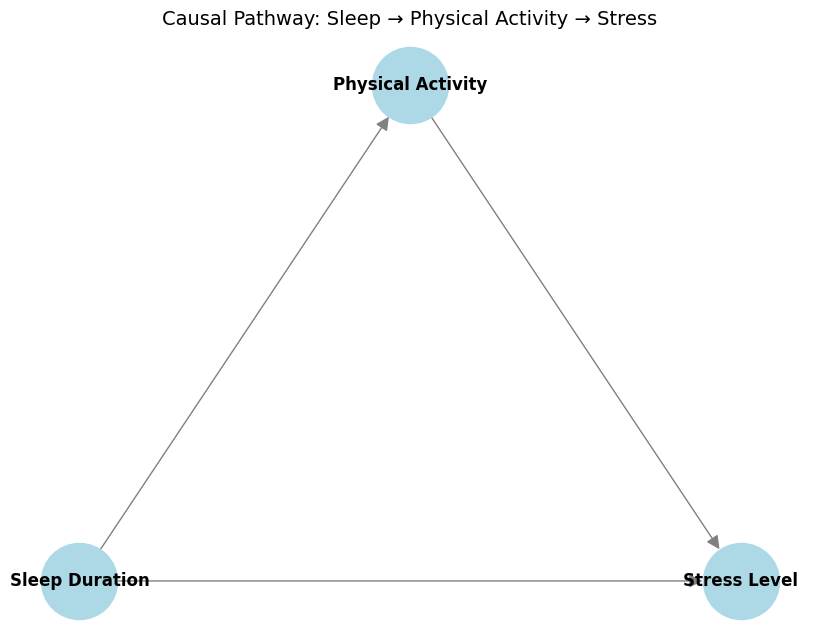

In [93]:
# Create DAG using NetworkX
G = nx.DiGraph()

# Define causal edges
edges = [
    ('Sleep Duration', 'Physical Activity'),
    ('Sleep Duration', 'Stress Level'),
    ('Physical Activity', 'Stress Level')
]
G.add_edges_from(edges)

# Specify node layout
pos = {
    'Sleep Duration': (0, 1),
    'Physical Activity': (1, 2),
    'Stress Level': (2, 1)
}

# Draw DAG
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    arrows=True,
    node_size=3000,
    node_color='lightblue',
    font_size=12,
    font_weight='bold',
    edge_color='gray',
    arrowstyle='-|>',
    arrowsize=20
)

plt.title('Causal Pathway: Sleep → Physical Activity → Stress', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

The Directed Acyclic Graph (DAG) above illustrates the hypothesized causal structure among **Sleep Duration**, **Physical Activity**, and **Stress Level**, based on behavioral science and domain knowledge.



## **Node Descriptions**

- **Sleep Duration**: Adequate sleep supports physiological and psychological recovery, directly reducing stress levels. It also improves daytime energy, which can increase engagement in physical activity.
  
- **Physical Activity**: Acts as a **mediator** in this causal pathway. Sleep influences physical activity, and activity itself can lower stress through neurochemical effects (e.g., endorphin release, improved mood regulation).

- **Stress Level**: The primary outcome in this analysis. It is influenced both directly by sleep and indirectly via physical activity.


## **Causal Arrows (Directed Edges)**

- **Sleep Duration → Stress Level**: Represents the **direct effect** of sleep on stress. Poor sleep can elevate cortisol levels and impair coping mechanisms, increasing stress.

- **Sleep Duration → Physical Activity**: Captures how sleep affects energy and motivation for physical exertion.

- **Physical Activity → Stress Level**: Reflects the potential **indirect (mediated) pathway**, where increased activity contributes to stress reduction.

## **Purpose and Implications**

This DAG provides a **structured framework** for reasoning about causal relationships and informs the design of mediation analysis:

- It helps identify **direct vs. indirect effects**, aiding in interpretation and intervention targeting.
- It clarifies **which paths should be estimated**, and which variables may act as **mediators** or need to be **adjusted for** in multivariate models.
- It supports the argument that improving **sleep patterns** may influence stress both **directly** and **through lifestyle behaviors** such as physical activity.

# **Complex Causal DAG: Diet, Physical Activity, Sleep, Stress, Cognition, and Mental Health**

This Directed Acyclic Graph (DAG) represents a complex, hypothesized causal structure based on domain knowledge. It captures the interactions among **lifestyle behaviors** (e.g., diet, physical activity, sleep), **psychological outcomes** (stress, mental health), and **cognitive function**.

**Key relationships:**
- **Diet** influences physical activity, sleep quality, and mental health both directly and indirectly.
- **Physical Activity** impacts both stress levels and cognitive functioning.
- **Sleep Quality** and **Stress** influence **Mental Health**, either directly or through cognition.
- **Cognitive Function** is treated as both an outcome (of activity and stress) and a mediator (influencing mental health).

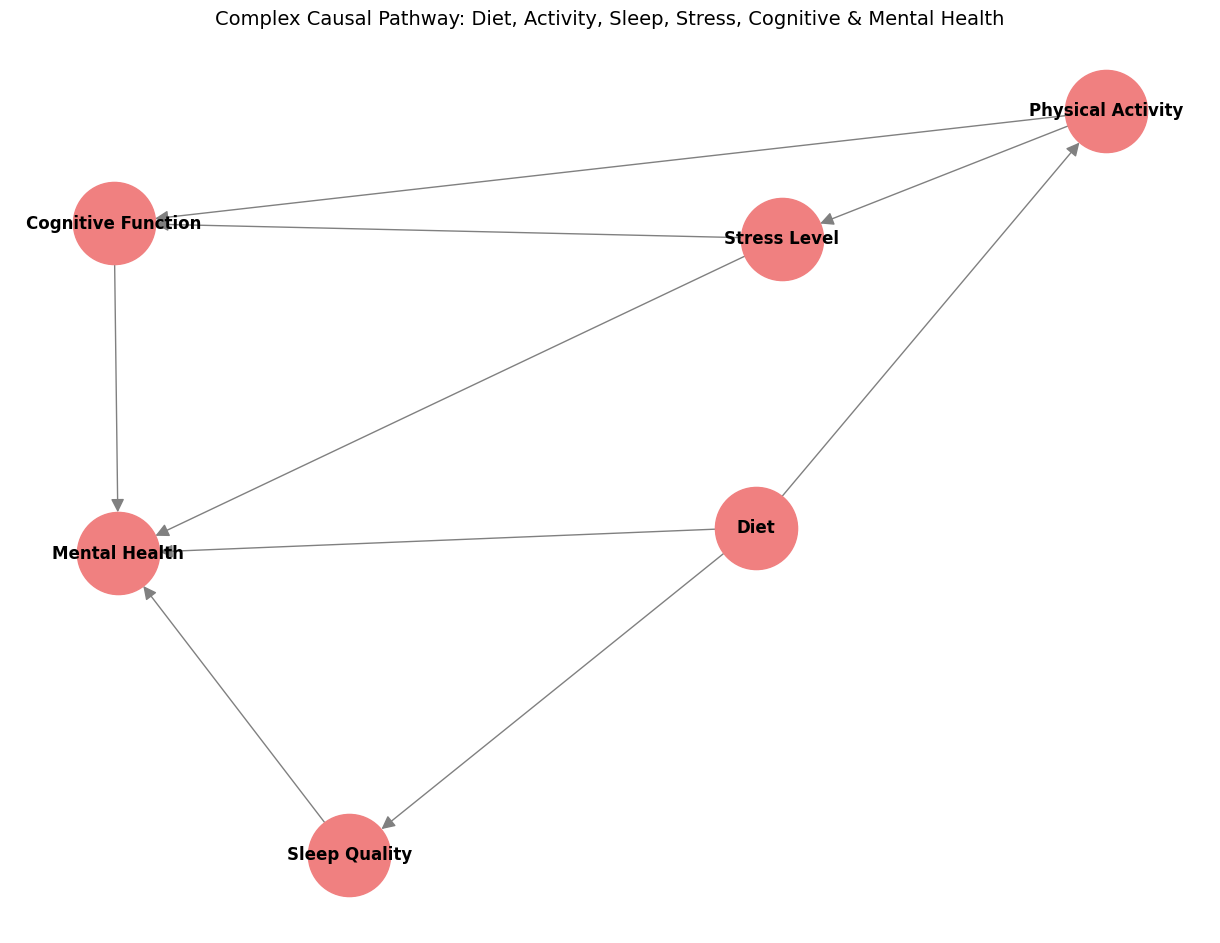

In [94]:
# Define the DAG structure
G = nx.DiGraph()
edges = [
    ('Diet', 'Physical Activity'),
    ('Diet', 'Sleep Quality'),
    ('Diet', 'Mental Health'),
    ('Physical Activity', 'Stress Level'),
    ('Physical Activity', 'Cognitive Function'),
    ('Sleep Quality', 'Mental Health'),
    ('Stress Level', 'Mental Health'),
    ('Cognitive Function', 'Mental Health'),
    ('Stress Level', 'Cognitive Function'),
]
G.add_edges_from(edges)

# Set layout (spring layout for better spacing)
pos = nx.spring_layout(G, k=0.8, seed=42)

# Plot the DAG
plt.figure(figsize=(12, 9))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightcoral',
    node_size=3500,
    font_size=12,
    font_weight='bold',
    edge_color='gray',
    arrows=True,
    arrowstyle='-|>',
    arrowsize=20
)

plt.title(
    'Complex Causal Pathway: Diet, Activity, Sleep, Stress, Cognitive & Mental Health',
    fontsize=14
)
plt.axis('off')
plt.tight_layout()
plt.show()


The diagram above represents the hypothesized **causal relationships** between key lifestyle and psychological variables, including **Physical Activity**, **Diet**, **Sleep Quality**, **Stress Level**, **Cognitive Function**, and **Mental Health**. It uses a **Directed Acyclic Graph (DAG)** to visualize the interplay of direct and indirect effects based on domain knowledge.



### **Key Variables and Their Roles**

- **Physical Activity**:
  - Enhances **Cognitive Function** through improved brain health and neuroplasticity.
  - Reduces **Stress Level** via endorphin release and mood regulation mechanisms.

- **Cognitive Function**:
  - Influences an individual’s capacity to manage stress. Strong cognitive abilities are linked to better stress resilience.

- **Diet**:
  - Affects both **Sleep Quality** and **Mental Health**.
  - Nutrient-rich diets support emotional balance and circadian regulation, while poor nutrition can impair psychological well-being.

- **Sleep Quality**:
  - Directly impacts **Mental Health** by promoting emotional regulation and mental recovery.
  - Poor sleep is a known risk factor for anxiety, depression, and mood disorders.

- **Stress Level**:
  - Acts as a **mediator** between other variables (e.g., Physical Activity and Mental Health).
  - High stress disrupts sleep and undermines mental well-being.

- **Mental Health**:
  - Represents the final outcome, influenced by upstream factors including stress, sleep, diet, and activity.
  - Reflects overall emotional resilience, stability, and cognitive-emotional functioning.



### **Causal Pathways Represented in the DAG**

- **Physical Activity → Cognitive Function**: Captures the cognitive enhancement effects of exercise.
- **Physical Activity → Stress Level**: Reflects physical activity’s role in mitigating psychological stress.
- **Diet → Sleep Quality / Mental Health**: Shows how nutrition influences physiological and emotional recovery.
- **Sleep Quality → Mental Health**: Demonstrates the role of restorative sleep in emotional resilience.
- **Stress Level → Mental Health**: Highlights stress as a major risk factor for psychological disorders.
- **Stress Level → Cognitive Function**: Includes the feedback loop where stress can impair cognitive capacity.


### **Insights and Purpose**

This DAG helps structure reasoning around complex health relationships:

- Clarifies **direct vs. indirect effects**, enabling causal pathway decomposition.
- Supports hypothesis formation (e.g., “Does diet influence mental health through sleep quality?”).
- Guides **intervention design**: Improving sleep, diet, or physical activity may reduce stress and enhance mental health outcomes.
- Enables valid causal inference by helping identify confounders, mediators, and adjustment sets for model building.

# **Regression with Interaction Term: Sleep Duration × BMI Category → Stress Level**

This model includes an **interaction term** between **Sleep Duration** and **BMI Category** to explore whether the relationship between sleep and stress is **moderated by BMI status**.

The regression tests:

- The **main effect** of Sleep Duration on Stress Level
- The **main effect** of BMI Category
- The **interaction effect**: how the effect of Sleep Duration changes across BMI categories

A significant interaction would suggest that sleep’s impact on stress differs depending on BMI classification (e.g., Underweight, Normal, Overweight), indicating **heterogeneous treatment effects**.


In [95]:
# Include interaction term in regression
df['Sleep_BMI_Interaction'] = df['Sleep Duration'] * df['BMI Category'].factorize()[0]
X3 = df[['Sleep Duration', 'BMI Category', 'Sleep_BMI_Interaction']]
y3 = df['Stress Level']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()

# Model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           Stress Level   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     264.1
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.36e-91
Time:                        17:23:33   Log-Likelihood:                -530.62
No. Observations:                 374   AIC:                             1069.
Df Residuals:                     370   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.51

This regression model investigates the independent and interactive effects of **Sleep Duration** and **BMI Category** on **Stress Level** using an Ordinary Least Squares (OLS) approach. An interaction term is included to assess whether the effect of sleep on stress differs across BMI groups.



## **Model Performance**

- **R-squared = 0.682**: Indicates that 68.2% of the variability in Stress Level is explained by the model — a strong indicator of model fit.
- **Adjusted R-squared = 0.679**: Confirms model reliability after accounting for the number of predictors.


## **Coefficient Analysis**

- **Intercept (const = 19.52)**: Represents the baseline Stress Level when all predictors are zero. While not interpretable in a real-world context, it anchors the regression line.

- **Sleep Duration (coef = -1.96, p < 0.001)**:  
  A statistically significant and negative relationship. Each additional hour of sleep is associated with a **1.96 unit reduction** in Stress Level, holding BMI constant.

- **BMI Category (coef = -0.18, p < 0.001)**:  
  A statistically significant negative effect. As BMI category improves (e.g., from overweight to normal), Stress Level decreases by 0.18 units.

- **Interaction Term (Sleep × BMI) (coef = 0.01, p = 0.383)**:  
  The interaction effect is **not statistically significant**, suggesting that the combined influence of Sleep Duration and BMI on Stress Level is minimal or inconsistent across BMI groups.



## **Statistical Significance**

- Both **Sleep Duration** and **BMI Category** are statistically significant predictors of stress (**p < 0.001**).
- The **interaction term is not significant**, indicating no substantial moderating effect of BMI on the sleep–stress relationship.



## **Model Diagnostics**

- **Durbin-Watson = 0.885**: Indicates **positive autocorrelation** in residuals, suggesting potential model misspecification or omitted variables.
- **Omnibus and Jarque-Bera Tests**: Show minor **deviation from normality** in residuals; worth noting, though unlikely to drastically affect model validity.



## **Analytical Insights**

- The results **strongly support** the independent effects of Sleep Duration and BMI Category on Stress Level:
  - More sleep significantly reduces stress.
  - Healthier BMI categories are linked to lower stress.
- The **interaction between Sleep and BMI** is not significant, meaning their joint influence on stress is **not stronger** than their individual effects.



## **Practical Implications**

- Interventions aimed at **increasing sleep duration** and **improving BMI** are both likely to help reduce stress.
- While the interaction effect is not conclusive, addressing these factors **individually** can still provide meaningful benefits for stress management.
- Future work could incorporate additional mediators (e.g., diet, physical activity) or confounders to explore more complex pathways and improve model robustness.

# **Conclusion and Recommendations**

## **Key Findings**

The analysis provides robust evidence that both **Sleep Duration** and **BMI Category** are significant **independent predictors** of **Stress Level**:

- **Sufficient sleep duration** is strongly associated with **lower stress**, reinforcing the importance of restorative sleep for mental health.
- Individuals within **healthier BMI categories** (e.g., normal weight) tend to experience **lower stress levels**.
- The **interaction between Sleep Duration and BMI** was **not statistically significant**, suggesting that their **combined effect** on stress is **less impactful** than their individual contributions.
  
These findings imply that **Sleep Duration** and **BMI** operate as **separate, additive factors** in influencing stress, rather than interacting in a synergistic or multiplicative way.


## **Recommendations**

### **1. Promote Sleep Hygiene**
Encourage regular sleep schedules and create sleep-conducive environments (e.g., reduced screen time, dark and quiet rooms). Improving sleep quality and duration can directly contribute to stress reduction.

### **2. Encourage Regular Physical Activity**
Promote daily physical activity as a dual-purpose intervention: improving **physical health** and reducing **psychological stress**. Physical activity can also indirectly influence BMI, supporting broader well-being.

### **3. Target Overweight Individuals for Stress-Reduction Interventions**
Given the association between **higher BMI** and **increased stress**, design targeted programs that combine:
- Lifestyle coaching
- Nutritional counseling
- Structured fitness plans

These strategies can help manage stress and improve overall health outcomes in high-risk groups.


# **References**

- https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
- https://github.com/uber/causalml  
- https://www.bradyneal.com/causal-inference-course  
- https://matheusfacure.github.io/python-causality-handbook/landing-page.html  
- https://medium.com/@whystudying/causal-inference-with-python-causal-graphs-ef2f3a52c266  
- https://www.nature.com/articles/ijo200882  
- https://ajph.aphapublications.org/doi/10.2105/AJPH.2004.059204  
- https://www.cdc.gov/healthywater/surveillance/2021-waterborne-outbreaks-annual-report.html  
- https://statmodeling.stat.columbia.edu/  
- https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/  
- https://blogs.kent.ac.uk/jonw/files/2015/03/Rothman-Greenland-05-Causation-and-Causal-Inference-in-Epidemiology.pdf  
- https://towardsdatascience.com/a-complete-guide-to-causal-inference-8d5aaca68a47  
- https://www.plainconcepts.com/causal-ml/  
- https://li-ge.org/blog/causal-inference-tutorials/01-causal/  
- https://www.epa.gov/charlesriver/live-water-quality-data-lower-charles-river  

# **License**

MIT License

Copyright (c) 2025 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.